# Regressie - intro

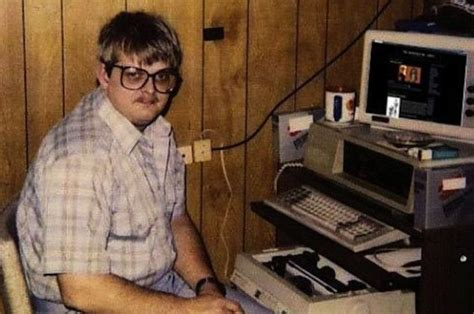

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [3]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [4]:
# 1 eerst zelf data genereren
# eerst alle x waardes genereren binnen een bepaalde range. 
# dit gaat het makkelijkst met numpy
# 2 op basis van de x waarde de y waardes berekenen.
# als je de y waardes hebt berekend wil je daar noice ana toeveogen, 
# 3 kan met numpy die noice moet normaal verdeeld zijn,. 

# met plotgraph kun je kijken of je data OK is. 

In [5]:
# ...


In [6]:
# # de 1d numpy array generenen voor de oppervlaktes van 50 / 75 m2 dit is de x-as

# a1 = np.linspace(50, 75, num=26)
# print (a1)
# print(f' My array a1 has "{a1.ndim}" dimentions.')




In [7]:
# # maak de y as van de array
# a = 5000
# b = 25000



# a2 = np.zeros((26, 2))        # maakt een nieue array met 26 bij 2 vakjes. 
# for n in range(26):           # gaat nu de 26 vakjes per i vullen 
#     y = a*a1[n]+b
#     a2[n, 0] = a1[n]          # maakt van het 1e vakje op de x as de waarde uit a1 van het eerste vakje. 
#     a2[n, 1] = y              # maakt van het 1e vakje op de y as de waarde die bij de waarde van de x has uit de aray a1 hoort.


# print(a2.shape)
# print (a2)

In [8]:
# maak een y as met noice

# de 1d numpy array generenen voor de oppervlaktes van 50 / 250 m2 dit is de x-as

min1 = 50
max1 = 250
max_min = max1+1-min1

a_f = 5000
b_f = 25000

a1 = np.linspace(min1, max1, num=max_min)


# de 2d numpy array genereren met de oppervlaktes en de prijzen van de huizen dat is de y as. 
# hierin wordt in de prijs formule de noice toegevoed. 



a2 = np.zeros((max_min, 2))        # maakt een nieue array met 26 bij 2 vakjes. 
for n in range(max_min):           # gaat nu de 26 vakjes per i vullen 
    ra1 = np.random.normal(a1)
    y_f = a_f*ra1[n]+b_f
    a2[n, 0] = a1[n]          # maakt van het 1e vakje op de x as de waarde uit a1 van het eerste vakje. 
    a2[n, 1] = y_f              # maakt van het 1e vakje op de y as de waarde die bij de waarde van de x has uit de aray a1 hoort.


print(a2.shape)
# print (a2)


(201, 2)



### Stap 2: Bekijk interval [50, 75] m2

[50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67.
 68. 69. 70. 71. 72. 73. 74. 75.]
[282652.42084739 271112.09203213 287270.5010301  293093.69080425
 301923.27316523 301617.81520791 302360.81249372 313243.59761588
 315253.87218078 319478.89564979 321485.53082299 336178.82312195
 338122.07854671 336585.06772666 351498.30244035 343793.97894035
 365858.57001146 359751.37042122 366683.92628062 371120.40771729
 369569.21447826 374845.02221731 387084.68113552 387832.74649866
 398210.86983076 403511.93337744]


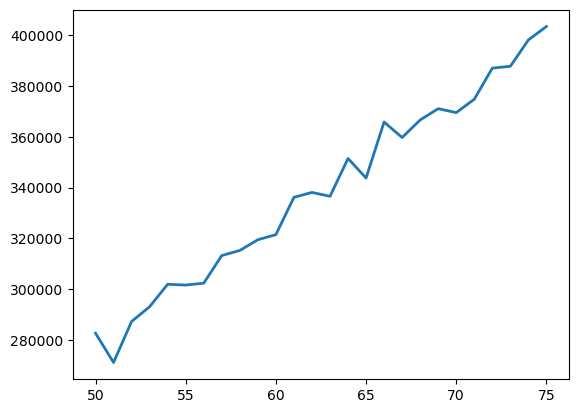

In [9]:
# haalt de posities op de x as van positie 0 t/m positie 26
house_m2 = a2[:,0][0:26] 

# haalt uit de range op de x as de variablen die erbij horen op de y as.
house_prise_50_75 = a2[np.logical_and(a2[:, 0] >= 50, a2[:, 0] < 76), 1]

 

print (house_m2)
print (house_prise_50_75)

plot_graph(house_m2,house_prise_50_75) 


### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [17]:
# from scipy.optimize import curve_fit

# Define our model
# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)


xdata = house_m2
ydata = house_prise_50_75
# p0=None
# sigma=None
# absolute_sigma=False
# check_finite=True
# bounds=(-inf, inf)
# method=None
# jac=None
# # *
# full_output=False
# # **kwargs


# Define the model function
def f(x, a, b):
    return a*x + b

# Use curve fitting to estimate the parameters of the model


# Use scipy optimize package
popt, pcov = cp.optimize.curve_fit(f, xdata, ydata)


# Create fit
model_ydata = f(xdata, *popt)
# print (model_ydata)

# Plot fit

# plt.scatter(xdata, ydata, label='Data')
# plt.plot(xdata, model_ydata, label='Model')
# plt.legend()
# plt.show()

# print(popt)
print (pcov)

[[ 1.57953769e+04 -9.87211060e+05]
 [-9.87211060e+05  6.25891815e+07]]


In [ ]:
xdata_2 = a2[:,0]
ydata_2 = a2[:,1]

def f_2(x, a, b):
    return a*x + b

# Use curve fitting to estimate the parameters of the model


# Use scipy optimize package
popt_2, pcov_2 = cp.optimize.curve_fit(f_2, xdata_2, ydata_2)


# Create fit
model_ydata_2 = f_2(xdata_2, *popt_2)

### Stap 4: Extrapoleer

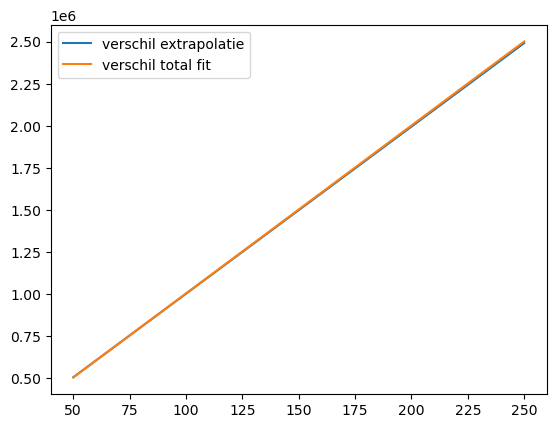

In [39]:
## wat bedoel je met deze vraag>?

# Create fit
## optimised curve voor gehele range
xdata_2 = a2[:,0]
ydata_2 = a2[:,1]

def f_2(x, a, b):
    return a*x + b

popt_2, pcov_2 = cp.optimize.curve_fit(f_2, xdata_2, ydata_2)

model_ydata_2 = f(xdata_2, *popt_2)
# Plot prediction for whole range



# extrapolatie van range 50-75 naar gehele range
a_all = popt[0]
b_all = popt[1]

x_2 = a2[:,0]
y_2 = a_all*x_2+b_all


# Create fit





# plt.scatter(x_2, y_2, label='plotted_Data_all')
# plt.plot(x_2, y_2, label='extrapolatie van range 50-75 naar gehele range')
# plt.plot(xdata_2, model_ydata_2, label='Model van gehele range')
# plt.plot(a2[:,0], a2[:,1], label='berekende data met noice')
# plt.plot(a2[:,0], 25000+a2[:,0]*5000, label='berekende data voor noice')

plt.plot(x_2, y_2-25000+a2[:,0]*5000, label='verschil extrapolatie')
plt.plot(x_2, model_ydata_2-25000+a2[:,0]*5000, label='verschil total fit')

plt.legend()
plt.show()
# ...

In [ ]:
plt.plot(x_2-a2[:,0], y_2-25000+a2[:,0]*5000, label='verschil extrapolatie')


plt.legend()
plt.show()

## Polynomiale verbanden

### Model

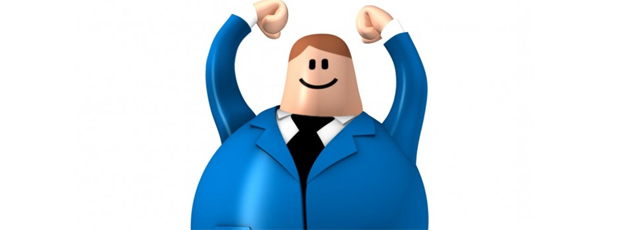

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [ ]:
# ...

### Stap 2: Fit data

In [ ]:
# Define our model

# ...

# Use scipy optimize package

# ...

# Create fit

# ...

# Plot fit

# ...

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861